In [1]:
from train_score_fixed_end_pt import *

import jax
import orbax.checkpoint
from src.training import utils
import matplotlib.pyplot as plt


In [2]:
orbax_checkpointer = orbax.checkpoint.PyTreeCheckpointer()

empty_train_state = utils.create_train_state(
    model, jax.random.PRNGKey(0), training["lr"], *model_shape
)
target = {"state":empty_train_state, "sde": sde, "network":network, "training":training}

restored = orbax_checkpointer.restore(checkpoint_path, item=target)
train_state = restored["state"]
trained_score = utils.trained_score(train_state)

In [3]:
from src.data_generate_sde import utils as sde_utils
from src.data_generate_sde import time


def plot_conditioned_trajectory(ts, x0, score_fn, drift, diffusion):
    traj_keys = jax.random.split(jax.random.PRNGKey(1), 20)
    conditioned_traj = jax.vmap(
        sde_utils.conditioned, in_axes=(0, None, None, None, None, None)
    )

    trajs = conditioned_traj(
        traj_keys,
        ts,
        x0,
        score_fn,
        drift,
        diffusion,
    ).ys

    for traj in trajs:
        plt.plot(ts, traj)
    plt.show()


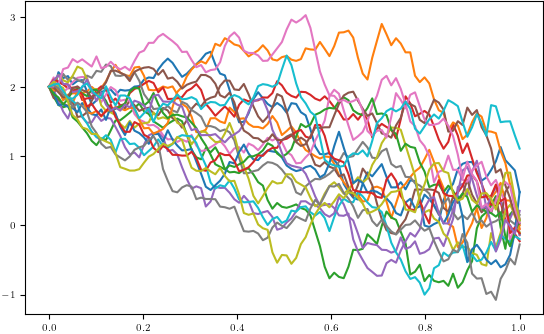

In [8]:
from tueplots import bundles

bundle = bundles.neurips2023()
plt.rcParams.update(bundle)

ts = time.grid(0, 1., 100)
drift, diffusion = sde_time_dependent.vector_fields()
plot_conditioned_trajectory(ts, (2.,), trained_score, drift, diffusion)